# HW 9.14:
A redo opportunity, to get the full problem right and study this specific Hamiltonian.

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Γ1 = 0.5
Γ2 = 0.25
α = 0.1 + 0.2j
H = Qobj([[Γ1, α, 0], [np.conj(α), Γ1, 0], [0, 0, Γ2]])
H

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.5 +0.j  0.1 +0.2j 0.  +0.j ]
 [0.1 -0.2j 0.5 +0.j  0.  +0.j ]
 [0.  +0.j  0.  +0.j  0.25+0.j ]]

In [3]:
# Make sure this is Hermitian:
H.isherm

True

In [4]:
energies, [E1, E2, E3] = H.eigenstates()

In [5]:
energies

array([0.25     , 0.2763932, 0.7236068])

In [6]:
print(Γ2)
print(Γ1 + np.abs(α))
print(Γ1 - np.abs(α))

0.25
0.7236067977499789
0.276393202250021


### These agree with
$\Gamma_2$ and $\Gamma_1 \pm |\alpha|$

In [7]:
E1

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]]

In [8]:
E2

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[ 0.70710678+0.j        ]
 [-0.31622777+0.63245553j]
 [ 0.        +0.j        ]]

In [9]:
E3

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[-0.70710678+0.j        ]
 [-0.31622777+0.63245553j]
 [ 0.        +0.j        ]]

### Now write the state $\big|a\big\rangle$ in terms of the energy eigenstates

In [10]:
a = Qobj([[1],[0],[0]])
a

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]]

In [11]:
a.dag()*E1

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

In [12]:
a.dag()*E2

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.70710678]]

In [13]:
a.dag()*E3

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-0.70710678]]

### And write  $\big|b\big\rangle$ in terms of the energy eigenstates 

In [14]:
b = Qobj([[0],[1],[0]])

In [15]:
b.dag()*E1

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

In [16]:
b.dag()*E2

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-0.31622777+0.63245553j]]

In [17]:
b.dag()*E3

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-0.31622777+0.63245553j]]

### Solve for the time dynamics

In [18]:
N = 100
T = 2*np.pi/np.abs(α)   # period of oscillation
tlist = np.linspace(0,T,N)
proj_b = b.dag()*b
solution = sesolve(H, a, tlist, [proj_b])

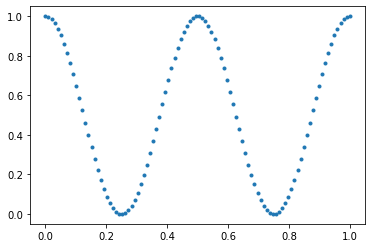

In [19]:
plt.plot(tlist/T,solution.expect[0],".")

### Consistent with $P(b,t) = \sin^2(|\alpha|t/\hbar)$